In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
def gradientdescent(x,y,max_iter=1000, lr = 0.01, normalize = False):
    if normalize:
        x = x/y
        y = y/y
    tolerance = 10**(-3)
    grad = 92
    a = np.random.random()
    iter_ = 0
    print("a'nın başlangıç değeri: ",a)
    while (abs(grad) > tolerance) and (max_iter > iter_):
        grad = 2 * (y - a*x)*(-x)
        a = a - lr * grad
        if iter_ % 100 == 0:
            print(f"gradient iterasyonu {iter_}, gradient {grad}")
        iter_ += 1
    print("son iterasyon no:", iter_)
    print("mevcut gradient:", grad)
    return a

In [4]:
gradientdescent(2,2)

a'nın başlangıç değeri:  0.558689801919414
gradient iterasyonu 0, gradient -3.530481584644688
son iterasyon no: 99
mevcut gradient: -0.0009977943269188216


0.9998852536524043

In [5]:
0.1 + 0.1 + 0.1 == 0.3

False

---

# LİNEER REGRESYON

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [363]:
sns.load_dataset("diamonds").sample(150)

,carat,cut,color,clarity,depth,table,price,x,y,z
11336,1.01,Good,F,SI1,63.7,57.0,4989,6.40,6.35,4.06
1687,0.71,Very Good,D,VS2,63.0,57.0,3033,5.67,5.70,3.58
32387,0.32,Very Good,D,VVS2,60.1,58.0,791,4.41,4.44,2.66
34437,0.46,Premium,I,SI2,61.0,58.0,863,5.03,4.97,3.05
10756,1.01,Premium,E,SI1,62.9,59.0,4853,6.38,6.30,3.99
...,...,...,...,...,...,...,...,...,...,...
16709,0.30,Very Good,E,SI2,61.7,61.0,421,4.29,4.33,2.66
1714,0.32,Ideal,G,VS2,61.4,56.0,561,4.37,4.39,2.69
7806,1.03,Very Good,J,VS1,63.4,58.0,4292,6.36,6.42,4.05
30795,0.41,Ideal,I,VS2,62.0,57.0,742,4.74,4.77,2.95


In [362]:
np.random.seed(42)
df = sns.load_dataset("diamonds").sample(150)[["carat", "price"]].reset_index(drop=True)

In [131]:
df

,carat,price
0,0.24,559
1,0.58,2201
2,0.40,1238
3,0.43,1304
4,1.55,6901
...,...,...
145,0.25,525
146,1.02,5429
147,1.54,11897
148,0.33,781


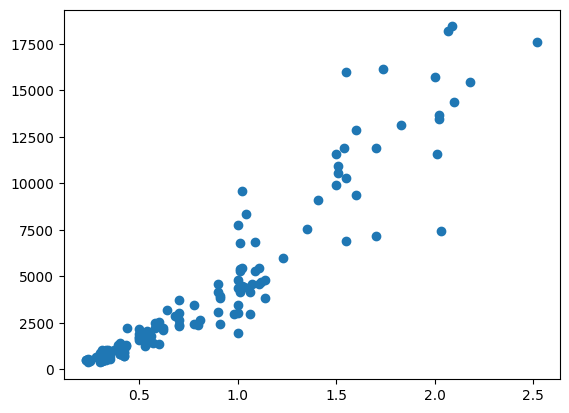

In [132]:
plt.scatter(df["carat"], df["price"])

In [133]:
from sympy import *

In [134]:
X = df["carat"]
Y = df["price"]

In [135]:
X.head()

0    0.24
1    0.58
2    0.40
3    0.43
4    1.55
Name: carat, dtype: float64

In [137]:
a = 0
b = 0
m = len(X)
alpha = 1e-4


In [138]:
J(0,0)

35755873.27333333

In [139]:
da = sum([2 * (a*X[i] + b - Y[i])*X[i] for i in range(m)]) / m
db = sum([2 * (a*X[i] + b - Y[i]) *1 for i in range(m)]) / m

In [140]:
a = a - alpha * da
b = b - alpha * db

In [141]:
J(a,b)

35737320.928407386

In [142]:
for i in range(100):
    da = sum([2 * (a*X[i] + b - Y[i])*X[i] for i in range(m)]) / m
    db = sum([2 * (a*X[i] + b - Y[i]) * 1 for i in range(m)]) / m

    a = a - alpha * da
    b = b - alpha * db

    print(J(a,b))


35718781.463882595
35700254.87060522
35681741.13942807
35663240.26121039
35644752.226817936
35626277.027123086
35607814.65300457
35589365.09534764
35570928.345044196
35552504.392992385
35534093.230097026
35515694.84726933
35497309.23542698
35478936.385494165
35460576.2884015
35442228.935086034
35423894.31649138
35405572.42356752
35387263.24727088
35368966.778564304
35350683.00841715
35332411.92780515
35314153.527710475
35295907.79912174
35277674.733033925
35259454.32044845
35241246.55237316
35223051.41982233
35204868.91381653
35186699.02538285
35168541.745554686
35150397.06537184
35132264.975880526
35114145.46813326
35096038.533189036
35077944.16211312
35059862.345977195
35041793.07585928
35023736.342843734
35005692.13802135
34987660.45248911
34969641.2773505
34951634.60371524
34933640.42269944
34915658.72542548
34897689.50302206
34879732.746624276
34861788.4473735
34843856.59641736
34825937.184909865
34808030.20401125
34790135.64488812
34772253.49871328
34754383.756665975
34736526.409

In [143]:
def J(a,b):
    m=len(X)
    mse = sum([(a*X[i] + b - Y[i])**2 for i in range(m)]) / m
    return mse


In [144]:
da

-10619.360158976895

In [145]:
db

-7768.203735540315

In [19]:
class LineerRegresyon:
    def __init__(self, alpha =1e-4, tol = 1e-4, max_iter = 1000):
        self.max_iter = max_iter
        self.alpha = alpha
        self.tol = tol
    
    def egit(self,X,Y):
        a = 0
        b = 0
        m = len(X)
        iter_ = 0
        # iterasyon
        while True:
            da = sum([2 * (a*X[i] + b - Y[i])*X[i] for i in range(m)]) / m
            db = sum([2 * (a*X[i] + b - Y[i]) for i in range(m)]) / m
            a = a - self.alpha * da
            b = b - self.alpha * db

            if (abs(da) < self.tol and abs(db) < self.tol) or iter_ > self.max_iter:
                break

            iter_ += 1
        if iter_ > self.max_iter:
            print("max iterasyon sayısına ulaşıldı")

        a: float
        b: float

        self.a = a
        self.b = b
        
    def tahmin(self, x):
        return self.a * x + self.b



In [20]:
np.array(X).shape

(150,)

In [21]:
class LineerRegresyonV(LineerRegresyon):

    def xitemizle(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = pd.DataFrame({"x" : X}).assign(c=1).values
        else:
            X = pd.DataFrame(X).assign(c=1).values
        return X

    def egit(self,X,Y):
        
        X = self.xitemizle(X)

        m, n = X.shape

        
        A = np.random.randn(n,1)
        Y = Y.values[:,None]

        m = X.shape[0]

        dA = 2* X.T @ (X @A  - Y) / m

        iter_ = 0
        # iterasyon
        while True:

            dA = 2* X.T @ (X @ A  - Y) / m
            self.dA = dA
            A = A - self.alpha * dA

            if (np.abs(dA) <= self.tol).all() or iter_ > self.max_iter:
                break

            iter_ += 1
            
        if iter_ > self.max_iter:
            print("max iterasyon sayısına ulaşıldı")

        self.A = A
    
    def tahmin(self, X):
        X = self.xitemizle(X)
        return X @ self.A

In [22]:
# (np.abs(A) <= 1e-4).all()

In [23]:
lr = LineerRegresyon(alpha = 5e-1)
lr.egit(X,Y)

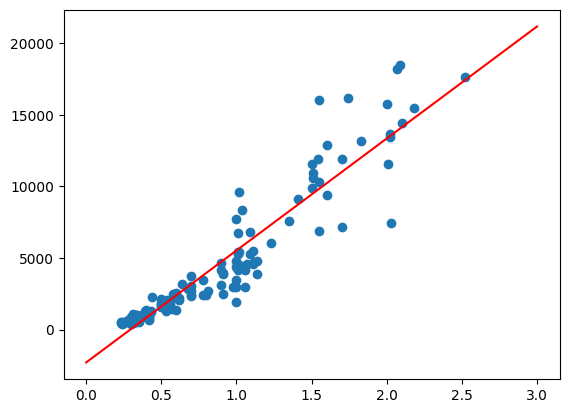

In [24]:
rng = np.linspace(0, 3, 1000)
plt.scatter(df["carat"], df["price"])
plt.plot(rng, [lr.tahmin(x) for x in rng], c="r")

In [25]:
lrv = LineerRegresyonV(alpha = 5e-1)
lrv.egit(X,Y)

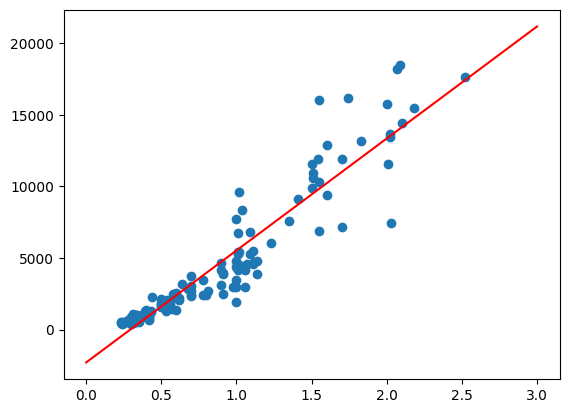

In [26]:
rng = np.linspace(0, 3, 1000)
plt.scatter(df["carat"], df["price"])
plt.plot(rng, lrv.tahmin(rng), c="r")

---

Multiple Linear Regression

In [328]:
np.random.seed(42) 
df1 = sns.load_dataset("diamonds").sample(150)[["carat", "depth","table","price"]].reset_index(drop=True)

In [329]:
X = df1[["carat", "depth","table"]]
Y = df1["price"]

In [202]:
Xnorm = (X - X.mean()) / X.std()

In [203]:
coklu_lr = LineerRegresyonV(alpha = 1.4e-4, max_iter=400_000, tol=1e-8)
coklu_lr.egit(Xnorm,Y)

In [204]:
coklu_lr.dA

array([[-3.24702645e-09],
       [ 9.23177822e-09],
       [ 9.99991547e-09],
       [-1.62290841e-09]])

In [205]:
X

,carat,depth,table
0,0.24,62.1,56.0
1,0.58,60.0,57.0
2,0.40,62.1,55.0
3,0.43,60.8,57.0
4,1.55,62.3,55.0
...,...,...,...
145,0.25,61.7,56.0
146,1.02,62.8,58.0
147,1.54,60.9,59.0
148,0.33,62.1,55.0


In [91]:
coklu_lr.dA

array([[-3.15506354e-05],
       [ 9.24303445e-05],
       [ 9.99970673e-05],
       [-2.48684046e-08]])

In [120]:
coklu_lr.A

array([[4175.38185875],
       [ -16.07749934],
       [-174.84109498],
       [4050.96666667]])

In [93]:
coklu_lr.tahmin([[0.29, 60.3, 56]])

array([[-5498.73790508]])

In [94]:
(np.array([[0.29, 60.3, 56]]) - X.mean().values) / X.std().values

array([[-0.98181704, -1.01579889, -0.5267022 ]])

In [95]:
coklu_lr.tahmin ((np.array([[0.29, 60.3, 56]]) - X.mean().values) / X.std().values)

array([[59.92621708]])

In [96]:
coklu_lr.A

array([[4175.38183271],
       [ -16.07742302],
       [-174.84101242],
       [4050.96666665]])

In [117]:
coklu_lr2 = LineerRegresyonV(alpha = 1.4e-2, max_iter=400_000, tol=1e-4)
coklu_lr2.egit(Xnorm / 19 + 0.2 ,Y)

In [98]:
coklu_lr2.tahmin ((np.array([[0.29, 60.3, 56]]) - X.mean().values) / X.std().values / 19 + 0.2)

array([[59.9241331]])

In [99]:
coklu_lr2.A

array([[ 79332.24910389],
       [  -305.44240063],
       [ -3321.94926266],
       [-11090.00483901]])

---

Hazır Kütüphaneler

In [198]:
from sklearn import linear_model

In [206]:
model = linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression()

In [207]:
model.predict(np.array([[0.29, 60.3, 56]]))

c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([59.92631255])

In [104]:
model.coef_

array([7863.41633622,  -10.86834918,  -78.88851211])

In [105]:
model.intercept_

2852.653708493733

In [122]:
((coklu_lr.tahmin(Xnorm).ravel() - Y)**2).mean()

2215053.243448913

In [110]:
((model.predict(X) - Y)**2).mean()

2215053.2434489136

In [116]:
coklu_lr2.A

array([[4175.38185875],
       [ -16.07749934],
       [-174.84109498],
       [4050.96666667]])

---

In [146]:
lr.tahmin(X.mean())

4050.9667014873494

In [147]:
Y.mean()

4050.9666666666667

In [148]:
(lr.tahmin(X)-Y).sum()

0.005223102482887043

In [149]:
lr.tahmin(X).sum()

607645.0052231026

In [150]:
Y.sum()

607645

In [151]:
print(lr.a)
print(lr.b)

7814.455658644848
-2289.1616562265035


In [152]:
x5 = X[:5]
y5 = Y[:5]

In [153]:
x5

0    0.24
1    0.58
2    0.40
3    0.43
4    1.55
Name: carat, dtype: float64

In [154]:
y5

0     559
1    2201
2    1238
3    1304
4    6901
Name: price, dtype: int64

In [155]:
x5[0] * lr.a + lr.b

-413.69229815174003

In [156]:
[lr.tahmin(x) for x in x5]    

[-413.69229815174003,
 2243.222625787508,
 836.6206072314358,
 1071.054276990781,
 9823.24461467301]

In [157]:
lr.b

-2289.1616562265035

In [158]:
XX = pd.DataFrame({'carat': x5}).assign(c=1).values
XX

array([[0.24, 1.  ],
       [0.58, 1.  ],
       [0.4 , 1.  ],
       [0.43, 1.  ],
       [1.55, 1.  ]])

In [159]:
A = np.array(
    [[lr.a], 
    [lr.b]])
A

array([[ 7814.45565864],
       [-2289.16165623]])

In [160]:
XX @ A

array([[-413.69229815],
       [2243.22262579],
       [ 836.62060723],
       [1071.05427699],
       [9823.24461467]])

In [161]:
a = 0
b = 0
m = len(X)
# iterasyon
da = sum([2 * (a*X[i] + b - Y[i])*X[i] for i in range(5)]) / m
db = sum([2 * (a*X[i] + b - Y[i]) for i in range(5)]) / m

In [162]:
da

-175.50946666666667

In [163]:
db

-162.70666666666668

In [164]:
YY = y5.values[:,None]
YY

array([[ 559],
       [2201],
       [1238],
       [1304],
       [6901]], dtype=int64)

In [165]:
YY.shape

(5, 1)

In [166]:
A

array([[ 7814.45565864],
       [-2289.16165623]])

In [167]:
XX.T @ (XX @ np.zeros((2,1)) - YY) / m * 2

array([[-175.50946667],
       [-162.70666667]])

In [168]:
class Model:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def predict(self, x):
        return self.a * x + self.b

In [172]:
def lineer_regresyon(X, Y, alpha=1e-4, tol=1e-4):
    # ilk tanımlar
    a = 0
    b = 0
    m = len(X)

    # iterasyonlar
    while True:
        da = sum([2 * (a*X[i] + b - Y[i])*X[i] for i in range(m)]) / m
        db = sum([2 * (a*X[i] + b - Y[i]) for i in range(m)]) / m
        a = a - alpha * da
        b = b - alpha * db

        if abs(da) < tol and abs(db) < tol:
            break

    a: float
    b: float
    
    return Model(a, b)

In [173]:
h = lineer_regresyon(X,Y, alpha=5e-1)     

In [174]:
h2 = lineer_regresyon(np.log(X), Y, alpha=1e-2)

In [175]:
h2.predict(np.log(0.3))

-758.3202303563676

In [176]:
a

0

In [177]:
b

0

In [178]:
h.predict(0.24)

-413.69229815174003

In [179]:
h.a

7814.455658644848

In [180]:
h.b

-2289.1616562265035

In [181]:
df.head()

,carat,price
0,0.24,559
1,0.58,2201
2,0.40,1238
3,0.43,1304
4,1.55,6901


In [182]:
rng = np.linspace(0, 3, 1000)

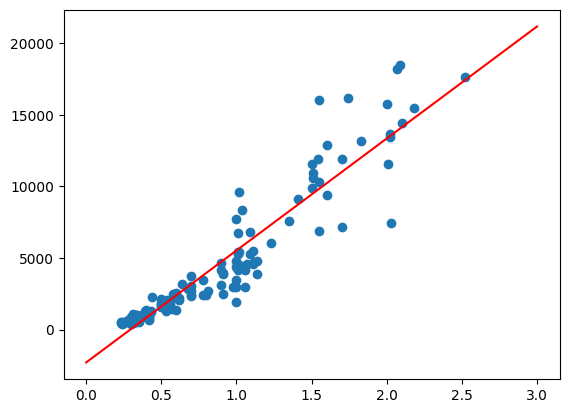

In [183]:
plt.scatter(df["carat"], df["price"])
plt.plot(rng, [h.predict(x) for x in rng], c="r")

C:\Users\kmara\AppData\Local\Temp\ipykernel_33788\3342843509.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(rng), [h2.predict(np.log(x)) for x in rng], c="r")


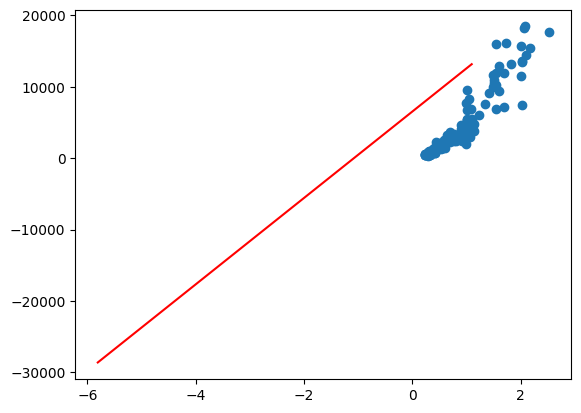

In [184]:
plt.scatter(df["carat"], df["price"])
plt.plot(np.log(rng), [h2.predict(np.log(x)) for x in rng], c="r")


---

Polinomiyel Regresyon

fiyat = a * carat^2 + b * carat + c

In [208]:
X["carat^2"] = X["carat"]**2

In [213]:
pol = linear_model.LinearRegression()
pol.fit(X[["carat", "carat^2"]], Y)

LinearRegression()

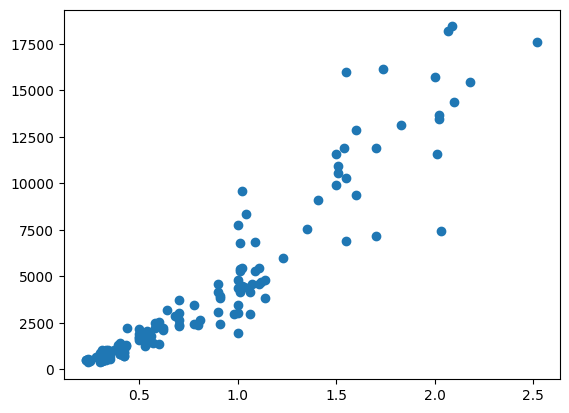

In [214]:
rng = np.linspace(0, 3, 1000)
plt.scatter(df["carat"], df["price"])
# plt.plot(rng, lrv.tahmin(rng), c="r")

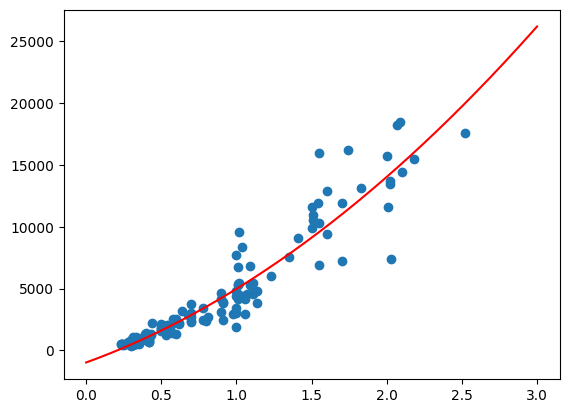

In [217]:
rng = np.linspace(0, 3, 1000)
plt.scatter(df1["carat"], df1["price"])
plt.plot(rng, pol.predict(pd.DataFrame({"carat": rng, "carat^2": rng**2})), c="r")

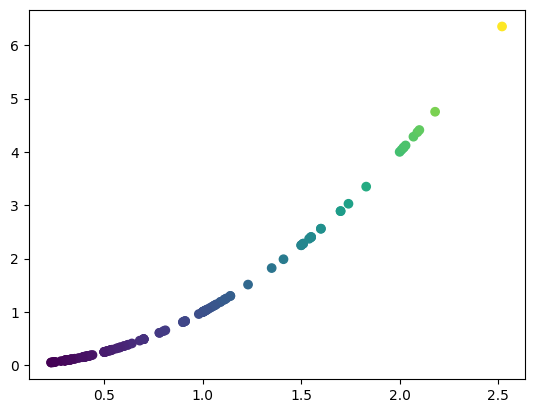

In [219]:
plt.scatter(df["carat"], df["carat"]**2, c = pol.predict(X[["carat", "carat^2"]]))

In [220]:
aa, bb = np.meshgrid(np.linspace(0, 2.5, 100), np.linspace(0, 2.5, 100))

In [223]:
zz = pol.predict(np.array([aa.ravel(), bb.ravel()]).T).reshape(aa.shape)

c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


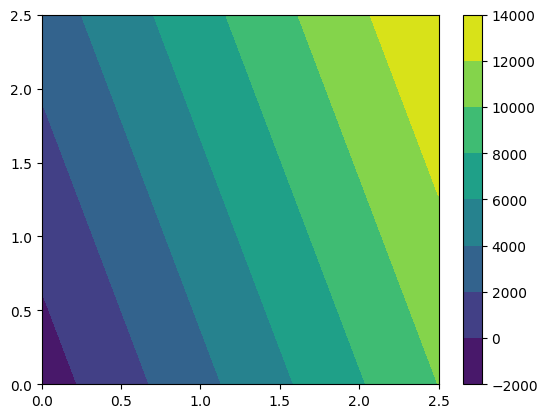

In [225]:
plt.contourf (aa, bb, zz)
plt.colorbar()

In [342]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [343]:
poly = preprocessing.PolynomialFeatures(32)

In [344]:
Xp = poly.fit_transform(X[["carat"]])

In [345]:
Xp.shape

(150, 33)

In [346]:
model_16 = linear_model.LinearRegression()
model_16.fit(Xp[:20], Y[:20])

LinearRegression()

In [347]:
model_16.score(Xp[:20], Y[:20])

0.9746847158375208

In [348]:
from sklearn import metrics

In [349]:
metrics.mean_squared_error(Y[:20], model_16.predict(Xp[:20]))

319354.8191505055

c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


(0.0, 40000.0)

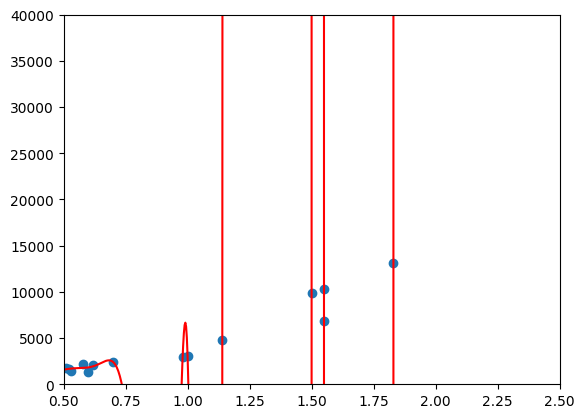

In [350]:
rng = np.linspace(0, 3, 1000)
plt.scatter(df1["carat"][:20], df1["price"][:20])
plt.plot(rng, model_16.predict(poly.transform(rng[:,None])), c="r")
plt.xlim(0.5,2.5)
plt.ylim(0, 40000)

In [351]:
model_16.predict(poly.transform([[2.15]]))

c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([-1.22893887e+16])

In [352]:
model_16.score(Xp, Y)

-1.7715615882997115e+28

In [318]:
poly3 = preprocessing.PolynomialFeatures(3)
Xp = poly3.fit_transform(X[["carat"]])
model_3 = linear_model.LinearRegression()
model_3.fit(Xp[:20], Y[:20])

LinearRegression()

In [294]:
model_3.score(Xp[:20], Y[:20])

0.9584429429617665

In [295]:
metrics.mean_squared_error(Y[:20], model_3.predict(Xp[:20]))

524246.393984487

c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


(0.0, 40000.0)

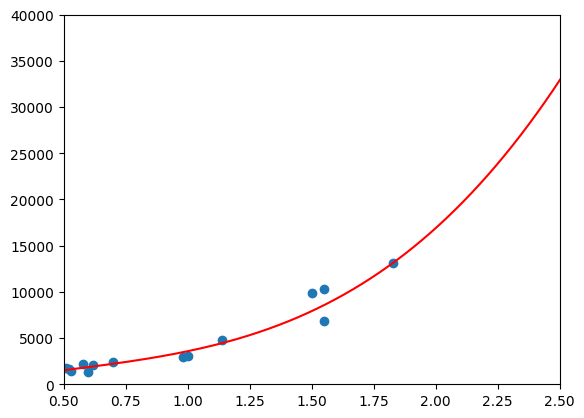

In [330]:
rng = np.linspace(0, 3, 1000)
plt.scatter(df1["carat"][:20], df1["price"][:20])
plt.plot(rng, model_3.predict(poly3.transform(rng[:,None])), c="r")
plt.xlim(0.5,2.5)
plt.ylim(0, 40000)

In [267]:
pd.Series(model_16.predict(poly.transform(X[["carat"]]))).describe()

count      150.000000
mean      4050.806297
std       4233.957581
min        502.886559
25%       1056.170772
50%       2120.867471
75%       4947.683145
max      17527.535280
dtype: float64

In [270]:
pd.Series(model_3.predict(poly3.transform(X[["carat"]]))).describe()

count      150.000000
mean      4050.966667
std       4192.545211
min        665.079813
25%       1008.261833
50%       1890.512936
75%       5244.663616
max      17257.573120
dtype: float64

In [314]:
model_16.fit(poly.transform(X[["carat"]])[:16], Y[:16])
model_16.score(poly.transform(X[["carat"]])[:16], Y[:16])

0.9683255940696454

In [355]:
metrics.mean_squared_error(Y[:16], model_16.predict(poly.transform(X[["carat"]])[:16]))

395927.5527378578

In [357]:
395927.5527378578**0.5

629.2277431406357

In [312]:
model_16.score(poly3.transform(X[["carat"]])[16:20], Y[16:20])

-2089458167349830.2

In [320]:
model_3.fit(poly3.transform(X[["carat"]])[:16], Y[:16])
model_3.score(poly3.transform(X[["carat"]])[:16], Y[:16])

0.9654945246861222

In [356]:
metrics.mean_absolute_percentage_error(Y[:16], model_3.predict(poly3.transform(X[["carat"]])[:16]))

0.1336181330264758

In [354]:
metrics.mean_squared_error(Y[:16], model_3.predict(poly3.transform(X[["carat"]])[:16]))

426630.7820252091

In [322]:
model_3.score(poly3.transform(X[["carat"]])[16:20], Y[16:20])

0.9177484276869029

In [360]:
#WAPE
metrics.mean_absolute_percentage_error(
    Y[:16], 
    model_3.predict(poly3.transform(X[["carat"]])[:16]),
    sample_weight= Y[:16])

0.11793248386570317